In [1]:
import sys
import os
"""
추가할 파일경로를 밑에 넣으면 됨
"""

'\n추가할 파일경로를 밑에 넣으면 됨\n'

In [2]:
from scipy.sparse.linalg import cg
import numpy as np

## Conjugate example with scipy

In [3]:
A=np.array([[4,-1,1],[-1,4,-2],[1,-2,4]]).astype(float);
b=np.array([12,-1,5]).astype(float)
x0 = np.array([0,0,0]).astype(float);
cg(A=A,b=b,x0=x0)

(array([ 3.,  1.,  1.]), 0)

### 수치해석의 진가

         Current function value: 1.248241
         Iterations: 7
         Function evaluations: 677
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: 1.198452
         Iterations: 116
         Function evaluations: 212
estimater parameters in cg:  [ 0.10908339  0.87204886  0.64805412]
estimater parameters in cg:  [ 0.12251835  0.73999037  0.81625913]
real parameters:  [ 0.10991755  0.81254248  0.75408249]


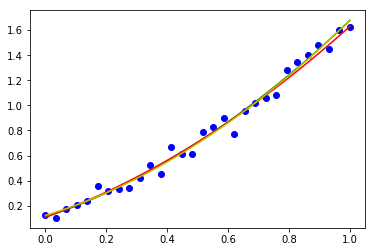

In [4]:
from pylab import *
from numpy import *
from numpy.random import normal
from scipy.optimize import fmin
from scipy.optimize import fmin_cg

# parametric function, x is the independent variable
# and c are the parameters.
# it's a polynomial of degree 2
fp = lambda c, x: c[0]+c[1]*x+c[2]*x*x
real_p = rand(3)

# error function to minimize
e = lambda p, x, y: (abs((fp(p,x)-y))).sum()

# generating data with noise
n = 30
x = linspace(0,1,n)
y = fp(real_p,x) + normal(0,0.05,n)

# fitting the data with fmin
p0 = rand(3) # initial parameter value
"""
parameter c0 c1 c2를 찾는다
"""
p_cg = fmin_cg(e, p0, args=(x,y))
p_justmin = fmin(e,p0,args=(x,y)) 
print('estimater parameters in cg: ', p_cg)
print('estimater parameters in cg: ', p_justmin)
print('real parameters: ', real_p)

xx = linspace(0,1,n*3)
plot(x,y,'bo', xx,fp(real_p,xx),'g', xx, fp(p_cg,xx),'r',xx,fp(p_justmin,xx),'y')

show()

## Linear Regression Version

         Current function value: 0.218562
         Iterations: 2
         Function evaluations: 244
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 0.218562
         Iterations: 61
         Function evaluations: 117
estimater parameters in cg:  [ 0.99854465  1.0001381 ]
estimater parameters in cg:  [ 0.99857798  1.00013781]
real parameters:  [1, 1]


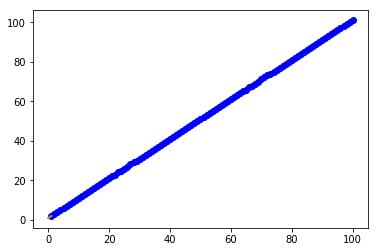

In [5]:
from scipy.optimize import fmin_cg

f = lambda c,x: c[0] + c[1]*x
real_p = [1,1];
e = lambda p,x,y : ((f(p,x)-y)**2).sum();
n = 100;
x = np.arange(1,101)
y = f(real_p,x) + normal(0,0.05,n);

p0 = rand(2);

p_cg = fmin_cg(e, p0, args=(x,y))
p_justmin = fmin(e,p0,args=(x,y)) 

print('estimater parameters in cg: ', p_cg)
print('estimater parameters in cg: ', p_justmin)
print('real parameters: ', real_p)

xx = linspace(0,1,n*3)
plot(x,y,'bo', xx,f(real_p,xx),'g', xx, f(p_cg,xx),'r',xx,f(p_justmin,xx),'y')

show()

## example 2.15

In [6]:
f = lambda c,x: c[0]*x[0] + c[1]*x[1] + c[2]*x[2]

In [7]:
real_p = np.array([3,1,1])
x = np.array([[4,-1,1],[-1,4,-2],[1,-2,4]])
y=f(real_p,x)
e= lambda p,x,y : 1/2*((np.transpose(p)@x)@p) - (y@p)

In [8]:
fmin_cg(e,np.array([0.0,0,0]),args=(x,y))

Optimization terminated successfully.
         Current function value: -20.000000
         Iterations: 3
         Function evaluations: 35
         Gradient evaluations: 7


array([ 3.00000005,  0.99999994,  1.00000001])